In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import pylab as pl
import scipy.optimize as opt

%matplotlib inline

### Load Data From CSV File

In [2]:
df = pd.read_csv('heart.csv')
df_new = df
df_new.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(df_new.shape)

(303, 14)


In [4]:
df_new.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
print(df['cp'].value_counts())

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


In [35]:
#  print the correlation between each column
#print(df_new.corr())

In [39]:
# print each column's null datas
#print(df_new.isnull().sum())

In [6]:
X = df_new.loc[:, df_new.columns!='output'].values

y = df['output'].values

#X[:2]

# Feature_selection with 'f_classif' method

In [7]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

df_final = df_new

# Create and fit selector
sel_f = SelectKBest(f_classif, k=8)

X_f = sel_f.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = sel_f .get_support(indices=True)
df_final = df_new.iloc[:,cols]

print(sel_f.get_support())
print(cols)
#print(X_f)

[False  True  True False False False False  True  True  True  True  True
  True]
[ 1  2  7  8  9 10 11 12]


In [453]:
df_final.head()

,sex,cp,thalachh,exng,oldpeak,slp,caa,thall
0,1,3,150,0,2.3,0,0,1
1,1,2,187,0,3.5,0,0,2
2,0,1,172,0,1.4,2,0,2
3,1,1,178,0,0.8,2,0,2
4,0,0,163,1,0.6,2,0,2


## Normalize Data

In [8]:
prep = preprocessing.StandardScaler() 
X_f = prep.fit(X_f).transform(X_f.astype(float))

#X[:2]

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_f, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 8) (242,)
Test set: (61, 8) (61,)


# 

# 

## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [15]:


# Training
Ks = 17
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    # Predicting
    yhat=neigh.predict(X_test)
    # Accuracy evaluation
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print('Test set Accuracy:' , mean_acc)
#print (std_acc[n-1] )

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9180327868852459 with k= 11


# 

# 

# Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Modeling
drugTree = DecisionTreeClassifier(criterion="entropy") #, max_depth = 4

drugTree.fit(X_train,y_train)

# Prediction
predTree = drugTree.predict(X_test)

#print (predTree [0:5])
#print (y_test [0:5])

# Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8360655737704918


# 

# 

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat = LR.predict(X_test)

# shows the probability of the output which is closer to 0 or 1 

yhat_prob = LR.predict_proba(X_test)
#yhat_prob

LR.score(X_train,y_train)

0.8429752066115702

### Evaluation

#### jaccard index

In [23]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, yhat,pos_label=0)

0.75

Confusion matrix, without normalization
[[33  3]
 [ 4 21]]


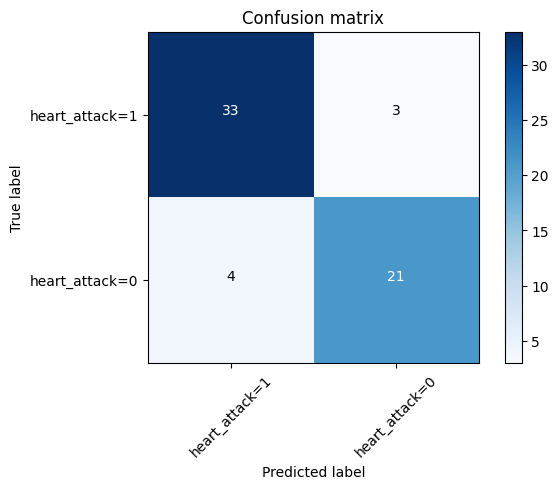

In [20]:
# plot the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#print(confusion_matrix(y_test, yhat, labels=[1,0]))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['heart_attack=1','heart_attack=0'],normalize= False,  title='Confusion matrix')

In [391]:
#print (classification_report(y_test, yhat))

### log loss

In [24]:
from sklearn.metrics import log_loss

log_loss(y_test, yhat_prob)

0.44582536614668566

# 

# 

# SVM

In [27]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score


# try all kernelling function
kernels = ['linear' , 'poly' , 'rbf' , 'sigmoid']
score = np.zeros(4)

for index in range(len(kernels)):
    clf = svm.SVC(kernel = kernels[index])
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    score[index] = f1_score(y_test, yhat, average='weighted')
    
    
print("The best f1_score was with", score.max(), "with kernel =", kernels[score.argmax()+1])

The best f1_score was with 0.8688524590163934 with kernel = poly


# 

# 

# :گزارش پروژه
ابتدا تایپ تمام داده های دیتافریم رو بررسی کردم که همه عدد باشن و اگر چیزی غیر عدد بود دیتامو تمیز کنم.بعد مقادیر هر ستون رو بررسی کردم که مثلا مقادیر منفی به عنوان داده پرت نداشته باشم و دیتا خالی از نویز باشه.سپس تمام ستون ها بجز ستون آخر(که بیمار بودن یا نبودن رو مشخص میکند)رو در آرایه ایکس و ستون مربوط به بیمار بودن یا نبودن را در آرایه ایگرگ ذخیره کردم.سپس از متد اف_کلاسیف برای پیدا کردن بهترین فیچر از استفاده آرایه ایکس استفاده کردم که با تغییر ایندکس کا در این فانکشن به اسکورهای متفاوتی در مدل هایم دست یافتم که در نهایت بهترین کا، عدد 8 انتخاب شد و فقط همین 8 ستون مشخص شده از فانکشن اف_کلاسیف رو در آرایه ایکس_اف نگهداری کردم که این آرایه ی جدید را برای مدل خود ترین و اسپلیت کنم. سپس آرایه های ایکس و ایگرگ را نرمال سازی کردم که مدل ها عملکرد بهتری داشته باشند و در نهایت 4 مدل : کا_ن_ن ، دیسیژن_تری ، رگرسیون لاجستیک و اس_وی_ام رو برای 80 درصد داده هایم ترین کردم و بهترین دقت برای مدل کا_ن_ن با کا=11 حاصل شد که میزان دقت تقریبا به عدد 92% رسید. در ادامه برای مدل رگرسیون لاجستیک، ماتریس کانفیژن را هم برای درک بهتر داده های واقعی و پیش بینی رسم کردم
